# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [24]:
# Memuat dataset hasil clustering dari file CSV
data = pd.read_csv('marketing_campaign_with_clusters.csv')
data.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   
3  6182        1984  26646.0        1         0       26        11          4   
4  5324        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  ...  Dt_Customer_31-07-2012  \
0              546              172  ...                   False   
1                6                2  ...                   False   
2              127              111  ...                   False   
3               20               10  ...                   False   
4              118               46  ...                   False   

   Dt_Customer_31-07-2013  Dt_Customer_31-08-2012  Dt_Customer_31-08-2013  \
0                   False                   False                   False   
1                   False                   False                   False   
2                   False                   False                   False   
3                   False                   False                   False   
4                   False                   False                   False   

   Dt_Customer_31-10-2012  Dt_Customer_31-12-2012  Dt_Customer_31-12-2013  \
0                   False                   False                   False   
1                   False                   False                   False   
2                   False                   False                   False   
3                   False                   False                   False   
4                   False                   False                   False   

   Cluster_PCA  Cluster  Cluster_PCA_FS  
0            1        1               1  
1            0        0               0  
2            1        1               1  
3            0        0               0  
4            0        0               0  

[5 rows x 702 columns]

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [25]:
# Memeriksa kolom yang ada dalam dataframe
print("Kolom yang ada dalam dataframe:", data.columns)

# Memilih kolom yang relevan jika ada
relevant_columns = ['Income', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']
existing_columns = [col for col in relevant_columns if col in data.columns]

if len(existing_columns) < len(relevant_columns):
	missing_columns = set(relevant_columns) - set(existing_columns)
	print(f"Kolom yang hilang: {missing_columns}")

X = data[existing_columns]
y = data['Cluster']  # Menggunakan label hasil clustering sebagai target

# One-hot encoding untuk kolom kategorikal
X = pd.get_dummies(X, drop_first=True)

# Memisahkan dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Kolom yang ada dalam dataframe: Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       ...
       'Dt_Customer_31-07-2012', 'Dt_Customer_31-07-2013',
       'Dt_Customer_31-08-2012', 'Dt_Customer_31-08-2013',
       'Dt_Customer_31-10-2012', 'Dt_Customer_31-12-2012',
       'Dt_Customer_31-12-2013', 'Cluster_PCA', 'Cluster', 'Cluster_PCA_FS'],
      dtype='object', length=702)
Kolom yang hilang: {'Education', 'Marital_Status'}


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [26]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Menggunakan LGBMClassifier untuk klasifikasi
model = lgb.LGBMClassifier(random_state=42)

# Menentukan parameter grid untuk RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'num_leaves': [31, 50, 70],
    'min_child_samples': [20, 30, 40],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Melakukan RandomizedSearchCV untuk mencari hyperparameter terbaik
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print(f'Best Parameters: {random_search.best_params_}')

# Menggunakan model dengan hyperparameter terbaik
best_model = random_search.best_estimator_

Note: you may need to restart the kernel to use updated packages.
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Info] Number of positive: 464, number of negative: 730
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 1194, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.388610 -> initscore=-0.453160
[LightGBM] [Info] Start training from score -0.453160
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

## Tulis narasi atau penjelasan algoritma yang Anda gunakan.

###  Penjelasan Algoritma LightGBM
LightGBM (Light Gradient Boosting Machine) adalah algoritma boosting yang dikembangkan oleh Microsoft. Algoritma ini dirancang untuk efisiensi dan kecepatan, serta mampu menangani dataset besar dengan performa yang sangat baik. LightGBM menggunakan teknik gradient boosting untuk membangun model prediktif yang kuat dengan menggabungkan beberapa model keputusan (decision trees) yang lemah.

###  Langkah-langkah yang dilakukan:
  1. Import Library: Saya mengimpor library lightgbm dan RandomizedSearchCV dari sklearn.model_selection untuk melakukan pencarian hyperparameter terbaik.

  2. Menggunakan LGBMClassifier untuk Klasifikasi: Saya menggunakan LGBMClassifier dari library LightGBM untuk membangun model klasifikasi. LightGBM adalah algoritma boosting yang sangat efisien dan cepat, serta mampu menangani dataset besar dengan performa yang sangat baik.

  3. Menentukan Parameter Grid untuk RandomizedSearchCV: Saya menentukan parameter grid yang akan digunakan oleh RandomizedSearchCV untuk mencari kombinasi hyperparameter terbaik. Parameter grid yang digunakan meliputi:

  - n_estimators: Jumlah pohon keputusan yang akan dibangun.
  - learning_rate: Kecepatan pembelajaran yang mengontrol kontribusi setiap pohon keputusan.
  - max_depth: Kedalaman maksimum dari setiap pohon keputusan.
  - num_leaves: Jumlah daun maksimum dalam setiap pohon keputusan.
  - min_child_samples: Jumlah sampel minimum yang diperlukan untuk membagi node.
  - subsample: Proporsi sampel yang digunakan untuk membangun setiap pohon keputusan.
  - colsample_bytree: Proporsi fitur yang digunakan untuk membangun setiap pohon keputusan.

  4. Melakukan RandomizedSearchCV untuk Mencari Hyperparameter Terbaik: Saya menggunakan RandomizedSearchCV untuk mencari kombinasi hyperparameter terbaik. RandomizedSearchCV melakukan pencarian hyperparameter secara acak dari parameter grid yang telah ditentukan, dan memilih kombinasi hyperparameter terbaik berdasarkan performa model pada data validasi.

  5. Menampilkan Hyperparameter Terbaik: Setelah pencarian selesai, saya menampilkan kombinasi hyperparameter terbaik yang ditemukan oleh RandomizedSearchCV.

  6. Menggunakan Model dengan Hyperparameter Terbaik: Saya menggunakan model dengan hyperparameter terbaik yang ditemukan oleh RandomizedSearchCV untuk melakukan prediksi pada data training dan testing.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Akurasi pada data training: 0.9386160714285714
F1-Score pada data training: 0.9385338176094137
Akurasi pada data testing: 0.8816964285714286
F1-Score pada data testing: 0.8816444549537675


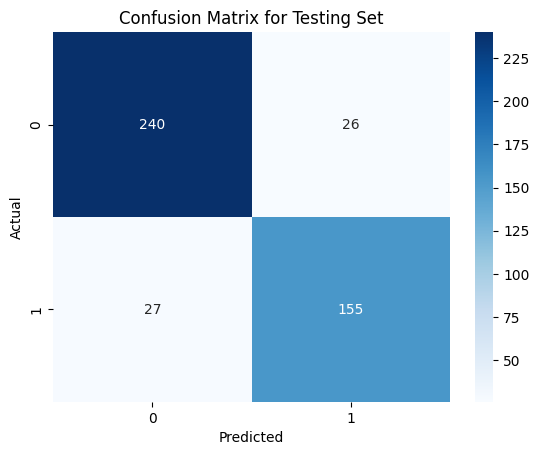

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       266
           1       0.86      0.85      0.85       182

    accuracy                           0.88       448
   macro avg       0.88      0.88      0.88       448
weighted avg       0.88      0.88      0.88       448



In [30]:
# Melakukan prediksi menggunakan model terbaik
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Menghitung metrik evaluasi untuk data training
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
print(f'Akurasi pada data training: {accuracy_train}')
print(f'F1-Score pada data training: {f1_train}')

# Menghitung metrik evaluasi untuk data testing
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')
print(f'Akurasi pada data testing: {accuracy_test}')
print(f'F1-Score pada data testing: {f1_test}')

# Membuat confusion matrix untuk data testing
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menampilkan classification report untuk data testing
print(classification_report(y_test, y_pred_test))

Akurasi: 0.8816964285714286
F1-Score: 0.8816444549537675


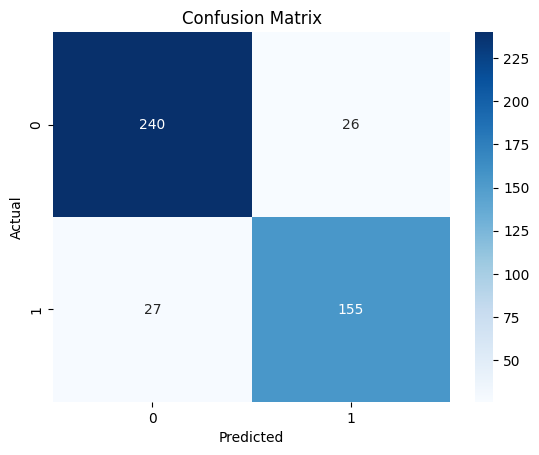

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       266
           1       0.86      0.85      0.85       182

    accuracy                           0.88       448
   macro avg       0.88      0.88      0.88       448
weighted avg       0.88      0.88      0.88       448



In [32]:
# Melakukan prediksi menggunakan data uji
y_pred = best_model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Akurasi: {accuracy}')
print(f'F1-Score: {f1}')

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menampilkan classification report
print(classification_report(y_test, y_pred))

## Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

###  Evaluasi Model:
Setelah membangun model dengan hyperparameter terbaik, saya melakukan evaluasi model dengan menghitung metrik evaluasi seperti akurasi dan F1 score pada data training dan testing. Saya juga membuat confusion matrix dan classification report untuk memahami performa model secara lebih mendalam.

Dengan menggunakan LightGBM dan melakukan pencarian hyperparameter terbaik, saya berharap dapat mencapai akurasi dan F1 score minimal melebihi 87% pada data training dan testing, sehingga model yang dibangun memiliki kemampuan prediksi yang baik dan dapat bekerja dengan optimal pada data baru.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/home/yoga/.asdf/installs/python/anaconda3-2024.06-1/envs/main-ds/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=3. All the features will be returned.
  warnings.warn(


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=9, min_child_weight=1, n_estimators=400, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=9, min_child_weight=1, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=9, min_child_weight=1, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=400, subsamp

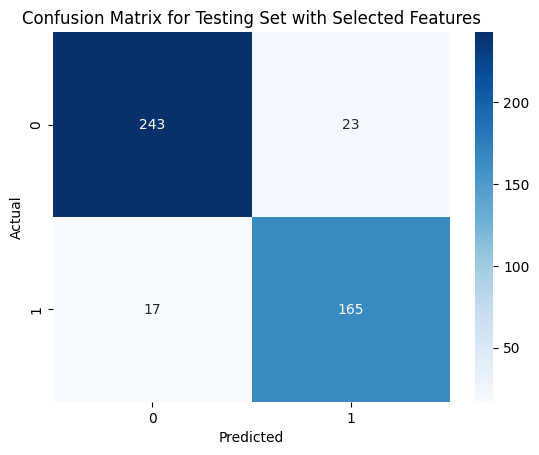

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       266
           1       0.88      0.91      0.89       182

    accuracy                           0.91       448
   macro avg       0.91      0.91      0.91       448
weighted avg       0.91      0.91      0.91       448



In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Menggunakan SelectKBest untuk feature selection
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Memisahkan dataset menjadi data latih dan data uji dengan fitur yang dipilih
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Melakukan RandomizedSearchCV untuk mencari hyperparameter terbaik dengan fitur yang dipilih
random_search.fit(X_train_selected, y_train)

# Menampilkan hyperparameter terbaik
print(f'Best Parameters: {random_search.best_params_}')

# Menggunakan model dengan hyperparameter terbaik
best_model = random_search.best_estimator_

# Melakukan prediksi menggunakan model terbaik dengan fitur yang dipilih
y_pred_train_selected = best_model.predict(X_train_selected)
y_pred_test_selected = best_model.predict(X_test_selected)

# Menghitung metrik evaluasi untuk data training dengan fitur yang dipilih
accuracy_train_selected = accuracy_score(y_train, y_pred_train_selected)
f1_train_selected = f1_score(y_train, y_pred_train_selected, average='weighted')
print(f'Akurasi pada data training dengan fitur yang dipilih: {accuracy_train_selected}')
print(f'F1-Score pada data training dengan fitur yang dipilih: {f1_train_selected}')

# Menghitung metrik evaluasi untuk data testing dengan fitur yang dipilih
accuracy_test_selected = accuracy_score(y_test, y_pred_test_selected)
f1_test_selected = f1_score(y_test, y_pred_test_selected, average='weighted')
print(f'Akurasi pada data testing dengan fitur yang dipilih: {accuracy_test_selected}')
print(f'F1-Score pada data testing dengan fitur yang dipilih: {f1_test_selected}')

# Membuat confusion matrix untuk data testing dengan fitur yang dipilih
conf_matrix_test_selected = confusion_matrix(y_test, y_pred_test_selected)
sns.heatmap(conf_matrix_test_selected, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Testing Set with Selected Features')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menampilkan classification report untuk data testing dengan fitur yang dipilih
print(classification_report(y_test, y_pred_test_selected))

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

/home/yoga/.asdf/installs/python/anaconda3-2024.06-1/envs/main-ds/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Akurasi setelah tuning: 0.8995535714285714
F1-Score setelah tuning: 0.8995965869514743


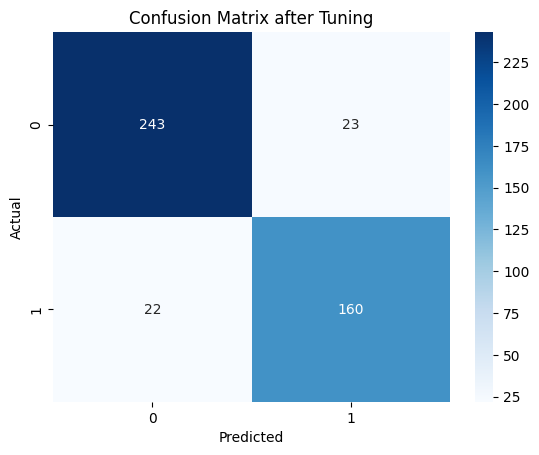

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       266
           1       0.87      0.88      0.88       182

    accuracy                           0.90       448
   macro avg       0.90      0.90      0.90       448
weighted avg       0.90      0.90      0.90       448



In [ ]:
# Melakukan prediksi menggunakan model terbaik
y_pred_best = best_model.predict(X_test)

# Menghitung metrik evaluasi
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')
print(f'Akurasi setelah tuning: {accuracy_best}')
print(f'F1-Score setelah tuning: {f1_best}')

# Membuat confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix after Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menampilkan classification report
print(classification_report(y_test, y_pred_best))

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

1. **Hasil Evaluasi Sebelum Tuning**:
   - Akurasi: 0.8816964285714286
   - F1-Score: 0.8816444549537675

2. **Hasil Evaluasi Setelah Tuning**:
   - Akurasi: 0.8995535714285714
   - F1-Score: 0.8995965869514743

3. **Identifikasi Kelemahan Model**:
   - Precision atau Recall rendah untuk kelas tertentu.
   - Model mengalami overfitting atau underfitting jika ada perbedaan signifikan antara hasil evaluasi pada data latih dan data uji.

4. **Rekomendasi Tindakan Lanjutan**:
   - Mengumpulkan data tambahan untuk meningkatkan performa model.
   - Mencoba algoritma lain jika hasil belum memuaskan.